In [31]:
import numpy as np
import matplotlib.pyplot as plt
import time
from gridworld import GridWorld
from utils import *

%matplotlib inline

## Environment 1: Cliffworld



### Set Up Environment 

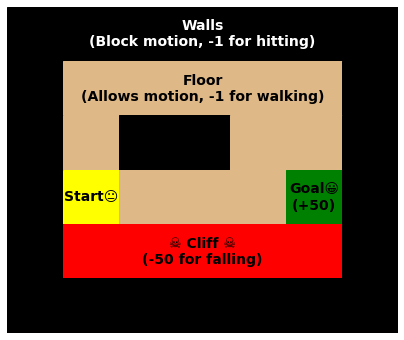

In [2]:
def cliffworld():
    """Construct the "cliffworld" environment."""
    return GridWorld(
        maze=[
            '#######',
            '#.....#',
            '#.##..#',
            '#o...*#',
            '#XXXXX#',
            '#######'
        ],
        rewards={
            '*': 50,         # gain 50 points for reaching goal
            'X': -50,        # lose 50 points for falling down
            'moved': -1,     # lose 1 point for walking
            'hit-wall': -1   # lose 1 point for stumbling into a wall
        }
    )

# Create cliffworld
env = cliffworld()

# Paint cliffworld
def square(x,y,**kw):
    plt.axhspan(y,y+1,xmin=x/7,xmax=(x+1)/7,**kw)

colors = {'#': 'black', '.': 'burlywood', 'X': 'red', '*': 'green', 'o': 'yellow'}

plt.figure(figsize=(7,6))

for y,row in enumerate(env.maze.topology):
    for x,cell in enumerate(row):
        square(x,5-y,color=colors[cell])
    
plt.axis('off')
plt.text(1.5,2.5,'Start😐', va='center', ha='center', fontweight='bold', fontsize=14)
plt.text(5.5,2.5,"Goal😀\n(+50)", va='center', ha='center', fontweight='bold', fontsize=14)
plt.text(3.5,1.5,"☠️ Cliff ☠️\n(-50 for falling)", va='center', ha='center', fontweight='bold', fontsize=14)
plt.text(3.5,5.5,"Walls\n(Block motion, -1 for hitting)", color='white', va='center', ha='center', fontweight='bold', fontsize=14)
plt.text(3.5,4.5,"Floor\n(Allows motion, -1 for walking)", va='center', ha='center', fontweight='bold', fontsize=14)
plt.xlim(0,7)
plt.ylim(0,6)

plt.show()

### Run simulation for SARSA, Expected SARSA, Q-learning, Double Q learning

In [3]:
# run 50 trials for each algorithm
trials_by_algo_and_params = {}

for method in ['SARSA', 'Expected-SARSA', 'Q-learning',  'Double-Q-learning']:
    for Q_initial in [0, 50]:
        key = (method, Q_initial)

        t1 = time.time()
        print('Testing', key)

        trials_by_algo_and_params[key] = []
        for independent_run in range(50):
            trials_by_algo_and_params[key].append(run_simulation(env, method, Q_initial=Q_initial))

        t2 = time.time()
        print('Took {:.1f}s'.format(t2-t1))

Testing ('SARSA', 0)
Took 20.4s
Testing ('SARSA', 50)
Took 19.6s
Testing ('Expected-SARSA', 0)
Took 23.7s
Testing ('Expected-SARSA', 50)
Took 25.1s
Testing ('Q-learning', 0)
Took 21.6s
Testing ('Q-learning', 50)
Took 19.8s
Testing ('Doubly-Q-learning', 0)
Took 20.6s
Testing ('Doubly-Q-learning', 50)
Took 20.3s


## Compare Algorithms

### Compare Policy

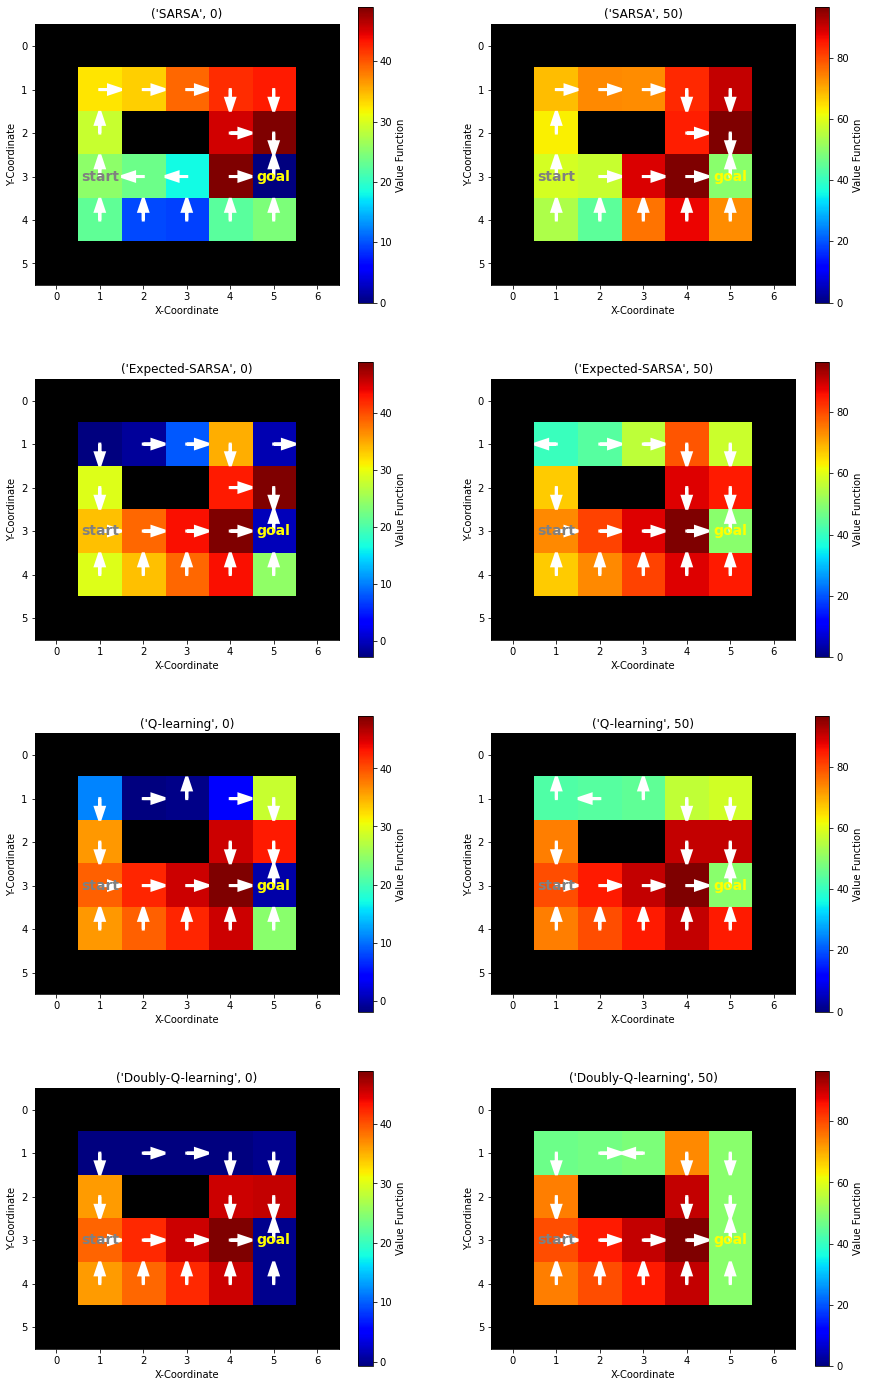

In [8]:
# policy for cliffworld
plt.figure(figsize=(15,25))
for i, (key, vals) in enumerate(trials_by_algo_and_params.items()):
    plt.subplot(4,2,i+1, title=key)
    plot_policy(env, vals[10]['Q']) #plot one of the policy

### Compare Rewards

In [50]:
def plot_mean_rewards(trials, lw=2, alpha=0.5, keep=100, **kw):
    rewards = np.array([t['episode_rewards'][:keep] for t in trials])
    plt.plot(rewards.mean(axis=0), lw=lw, alpha=alpha, **kw)
    
def plot_trial_rewards(key, trials_by_algo_and_params):
    plot_mean_rewards(trials_by_algo_and_params[key], color=colors[key[0]], ls=styles[key[1:]], label=key)


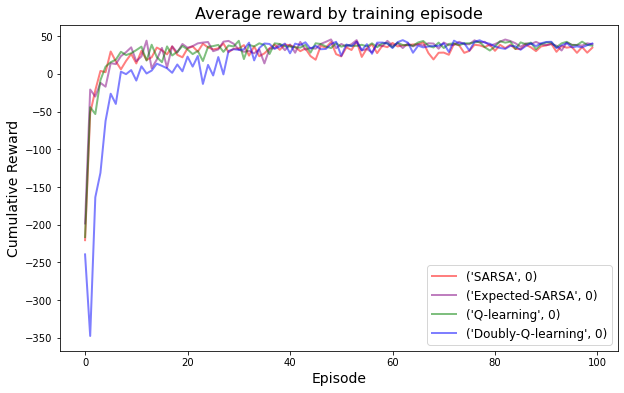

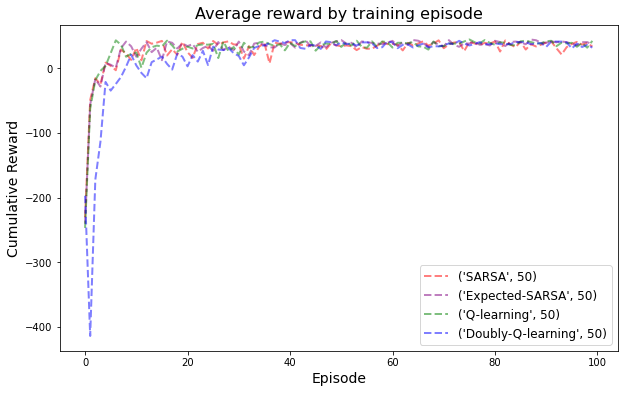

In [18]:
colors = {'SARSA': 'red', 'Q-learning': 'green','Doubly-Q-learning': 'blue', 'Expected-SARSA':'purple'}
styles = {  (0,): '-',   (50,): '--'}
    
plt.figure(figsize=(10,6))
plt.title("Average reward by training episode", fontsize=16)
for key in trials_by_algo_and_params.keys():
    if key[1] == 0:
        plot_trial_rewards(key, trials_by_algo_and_params)
    
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Cumulative Reward", fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()


plt.figure(figsize=(10,6))
plt.title("Average reward by training episode", fontsize=16)
for key in trials_by_algo_and_params.keys():
    if key[1] == 50:
        plot_trial_rewards(key, trials_by_algo_and_params)
    
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Cumulative Reward", fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()


## Environment 2: Maze

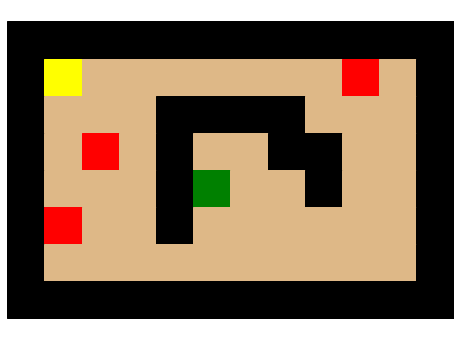

In [29]:
def maze():
    """Construct the "maze" environment."""
    return GridWorld(
        maze=[
            '############',
            '#o.......X.#',
            '#...####...#',
            '#.X.#..##..#',
            '#...#*..#..#',
            '#X..#......#',
            '#..........#',
            '############'
        ],
        rewards={
            '*': 50,         # gain 50 points for reaching goal
            'X': -50,        # lose 50 points for falling down
            'moved': -1,     # lose 1 point for walking
            'hit-wall': -1   # lose 1 point for stumbling into a wall
        }
    )

# Create cliffworld
env = maze()

# Paint cliffworld
def square(x,y,**kw):
    plt.axhspan(y,y+1,xmin=x/12,xmax=(x+1)/12,**kw)

colors = {'#': 'black', '.': 'burlywood', 'X': 'red', '*': 'green', 'o': 'yellow'}

plt.figure(figsize=(8,6))

for y,row in enumerate(env.maze.topology):
    for x,cell in enumerate(row):
        square(x,5-y,color=colors[cell])
    
plt.axis('off')
plt.show()

#### Explanations: 
- Yellow = Starting point
- Green = Goal (gain 50 points for reaching goal
- Red = pits (lose 50 points for falling down)
- Brown = land (lose 1 point for walking)
- Black = Wall (lose 1 point for stumbling into a wall)


### Run simulation for SARSA, Expected SARSA, Q-learning, Double Q learning

In [38]:
# run 50 trials for each algorithm
trials_by_algo_and_params = {}

for method in ['SARSA', 'Expected-SARSA', 'Q-learning',  'Double-Q-learning']:
    for Q_initial in [0]:
        key = (method, Q_initial)

        t1 = time.time()
        print('Testing', key)

        trials_by_algo_and_params[key] = []
        for independent_run in range(50):
            trials_by_algo_and_params[key].append(run_simulation(env, method, Q_initial=Q_initial))

        t2 = time.time()
        print('Took {:.1f}s'.format(t2-t1))

Testing ('Doubly-Q-learning', 0)
Took 19.8s


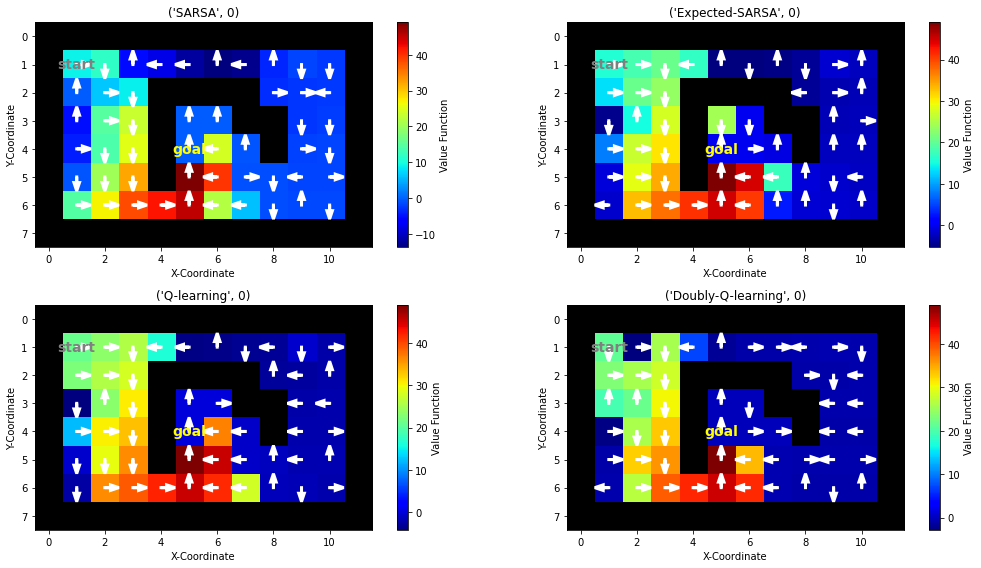

In [48]:
# policy for maze
plt.figure(figsize=(15,8))
for i, (key, vals) in enumerate(trials_by_algo_and_params.items()):
    plt.subplot(2,2,i+1, title=key)
    plot_policy(env, vals[10]['Q']) #plot one of the policy
    
plt.tight_layout()

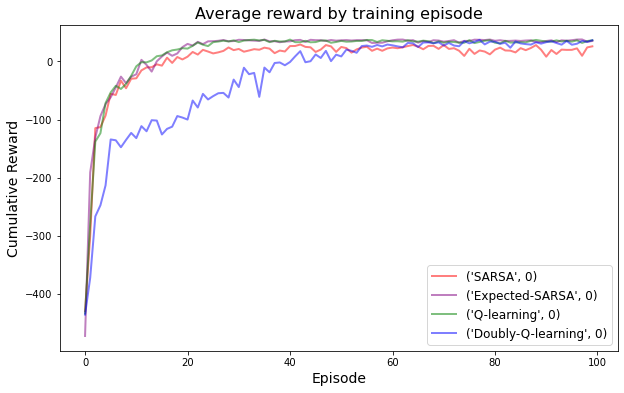

In [53]:
colors = {'SARSA': 'red', 'Q-learning': 'green','Double-Q-learning': 'blue', 'Expected-SARSA':'purple'}
styles = {  (0,): '-',   (50,): '--'}
    

plt.figure(figsize=(10,6))
plt.title("Average reward by training episode", fontsize=16)
for key in trials_by_algo_and_params.keys():
    if key[1] == 0:
        plot_trial_rewards(key, trials_by_algo_and_params)
    
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Cumulative Reward", fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.show()

